In [5]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

In [6]:
fs = 1000
N = 200
k = np.arange(200)
frq = k*fs/N
frq1 = frq[range(int(N/2))]

In [7]:
# 读取数据
import pandas as pd
data = pd.read_csv('../Resource/FLUXNET2015/China_Data/FLX_CN-Cha_FLUXNET2015_HH_2003-2005_DelZero_SW.csv')

In [8]:
data.head()

,TIMESTAMP_START,TA_F,SW_IN_F,LW_IN_F,VPD_F,PA_F,WS_F,RH
0,2003/1/1 6:30,-20.92,0.901,136.9,0.441,93.3,2.133,61.70
1,2003/1/1 7:00,-21.08,27.460,136.3,0.404,93.4,2.814,64.40
2,2003/1/1 7:30,-20.82,91.000,135.1,0.408,93.4,1.794,64.84
3,2003/1/1 8:00,-20.10,173.500,133.6,0.452,93.4,1.796,63.44
4,2003/1/1 8:30,-19.05,255.200,133.8,0.537,93.4,2.193,60.31


In [13]:
data = data.iloc[0:1888]
data = data[['TA_F','SW_IN_F','LW_IN_F','VPD_F','PA_F','WS_F','RH']]

In [14]:
import pandas as pd
import numpy as np
import pyperclip

# # 将从Excel中复制的数据粘贴到剪贴板中
# data_from_excel = pyperclip.paste()
#
# # 将数据转换为一维数组
# data_array = np.array(pd.read_clipboard(header=None, sep=',', dtype=str).iloc[:, 0])
#
# # 打印数组
# print(data_array)
data_array = np.array(data.iloc[:,0:4])
# 转置数组并将其转换为嵌套列表
data_list = data_array.transpose().tolist()
#print(data_list)


In [15]:
import numpy as np
import pandas as pd

# 将数据转为二维数组
data_array = np.array(data)

# 对二维数组进行转置
transposed_array = data_array.transpose()

# 输出转置后的数组
print(transposed_array)


[[-20.92  -21.08  -20.82  ...   8.52    8.33    7.877]
 [  0.901  27.46   91.    ... 228.6   135.7    54.87 ]
 [136.9   136.3   135.1   ... 231.5   228.1   225.7  ]
 ...
 [ 93.3    93.4    93.4   ...  92.8    92.8    92.8  ]
 [  2.133   2.814   1.794 ...   3.612   3.173   2.816]
 [ 61.7    64.4    64.84  ...  28.1    27.85   28.22 ]]


In [16]:
aa = []
for i in range(200):
    aa.append(np.sin(0.3*np.pi*i))
for i in range(200):
    aa.append(np.sin(0.13*np.pi*i))
for i in range(200):
    aa.append(np.sin(0.05*np.pi*i))
y = aa
# print(y)

In [17]:
import pandas as pd
import pywt
import openpyxl

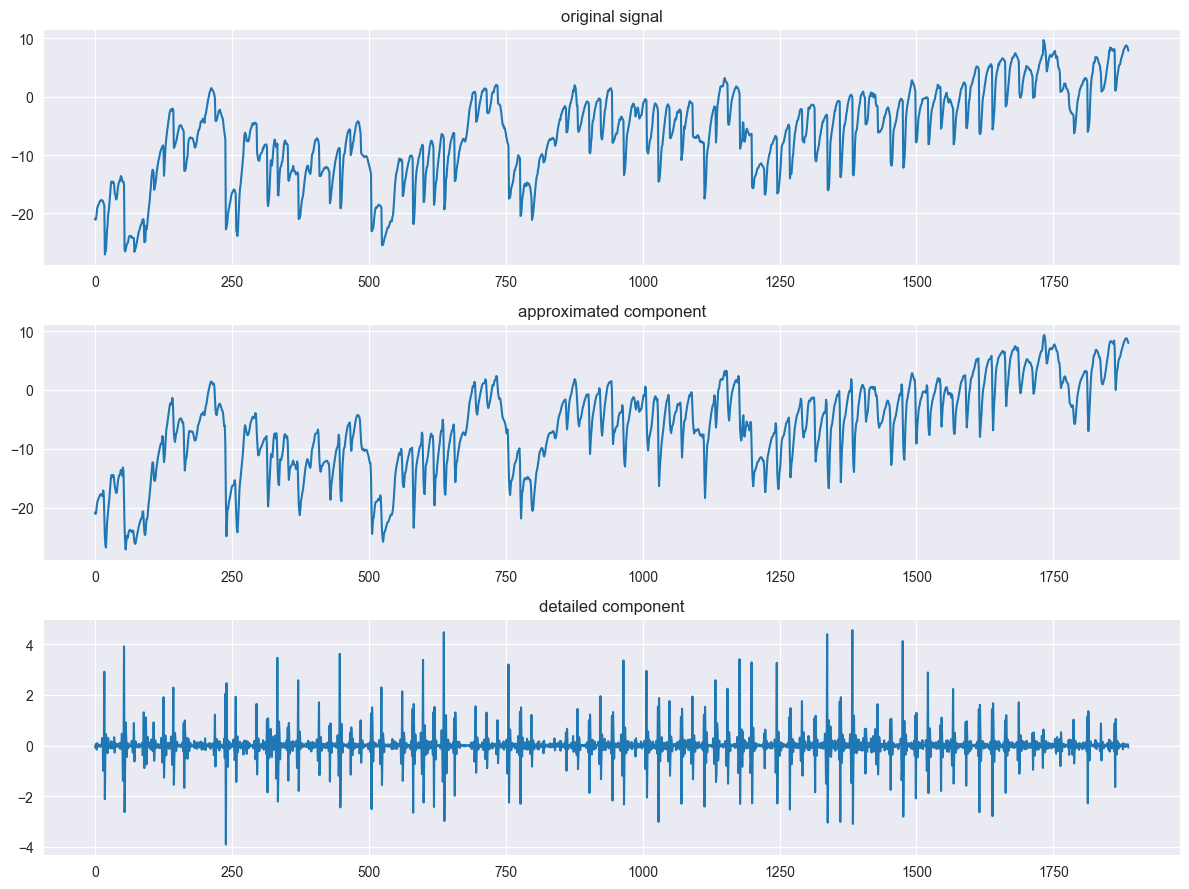

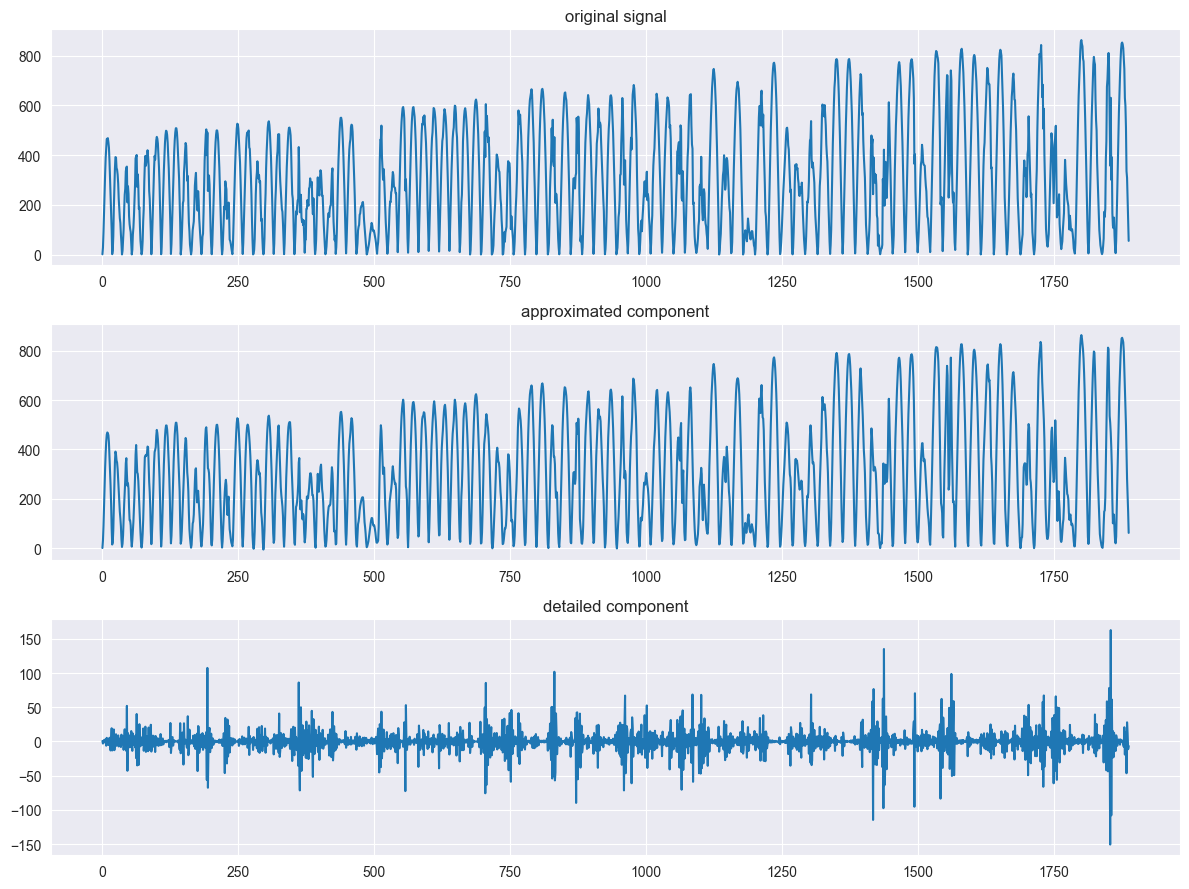

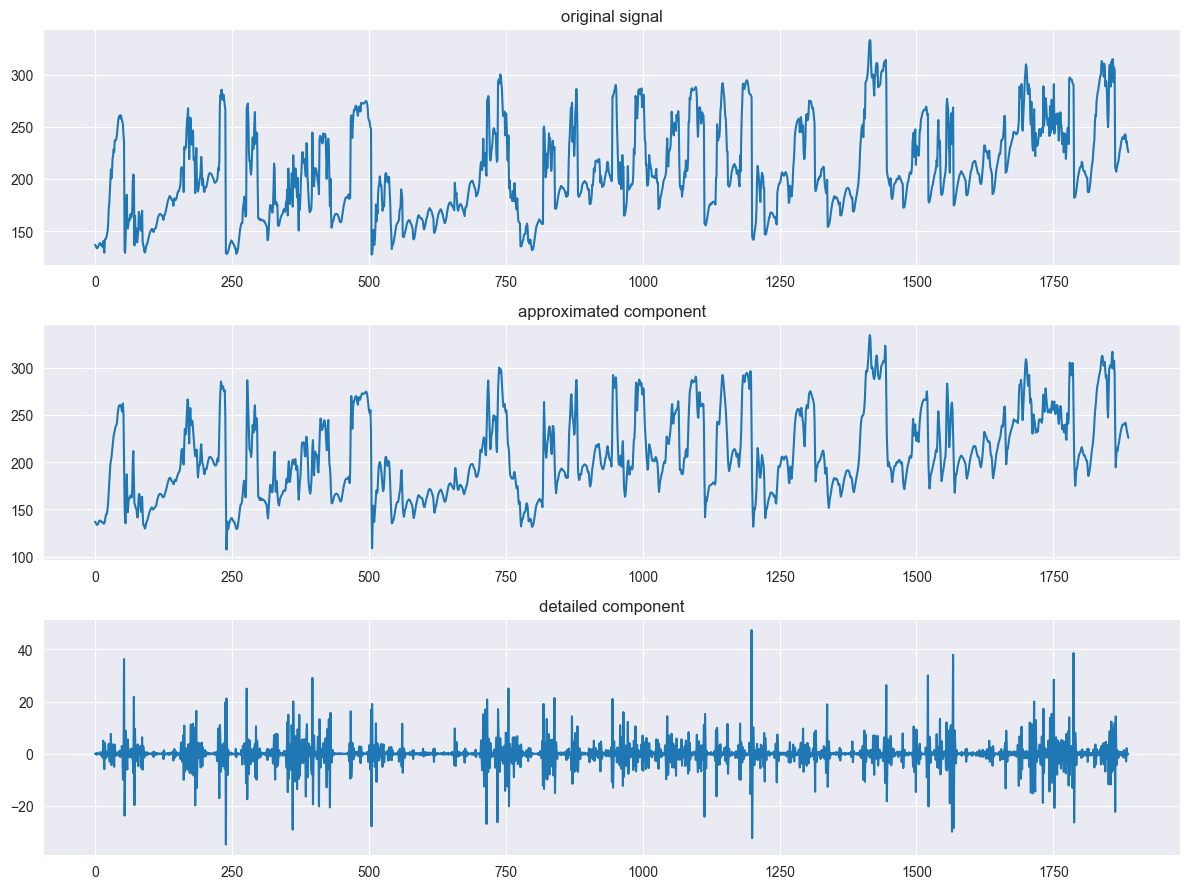

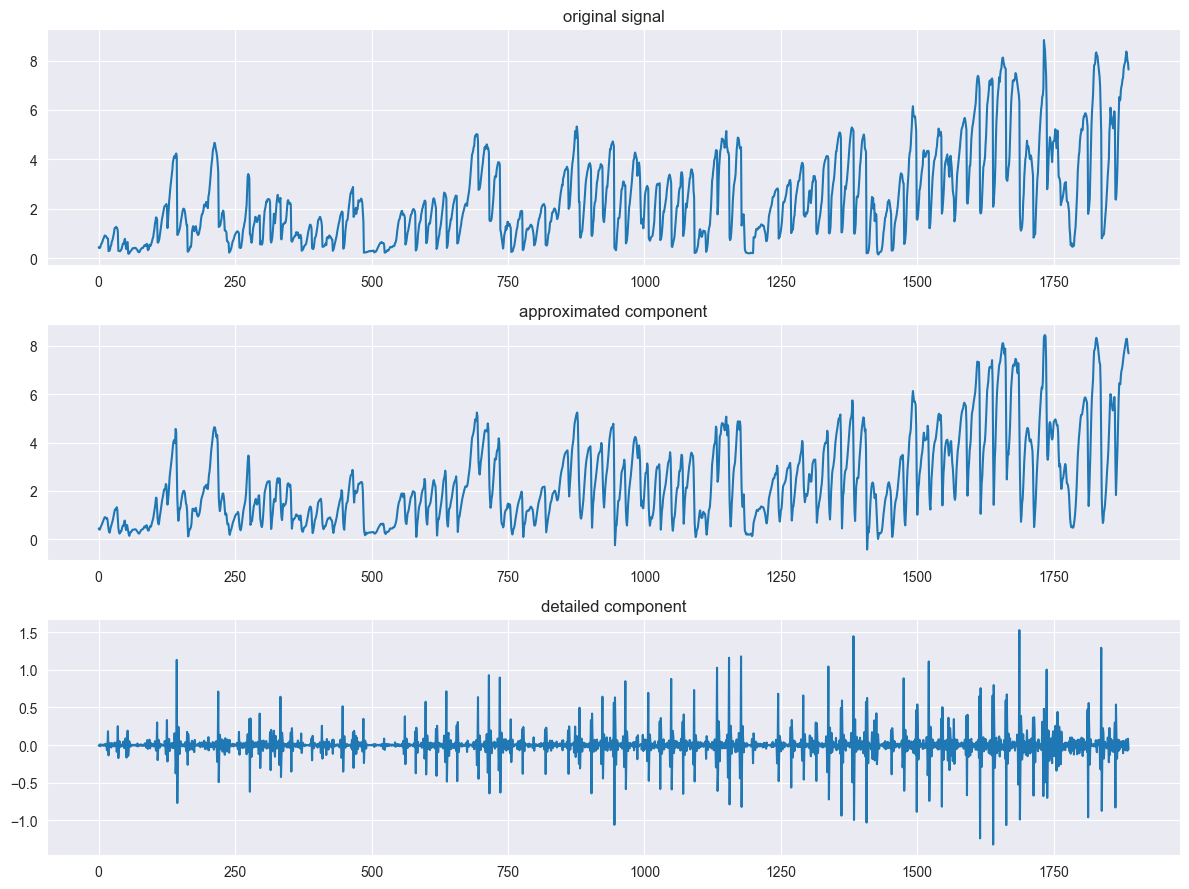

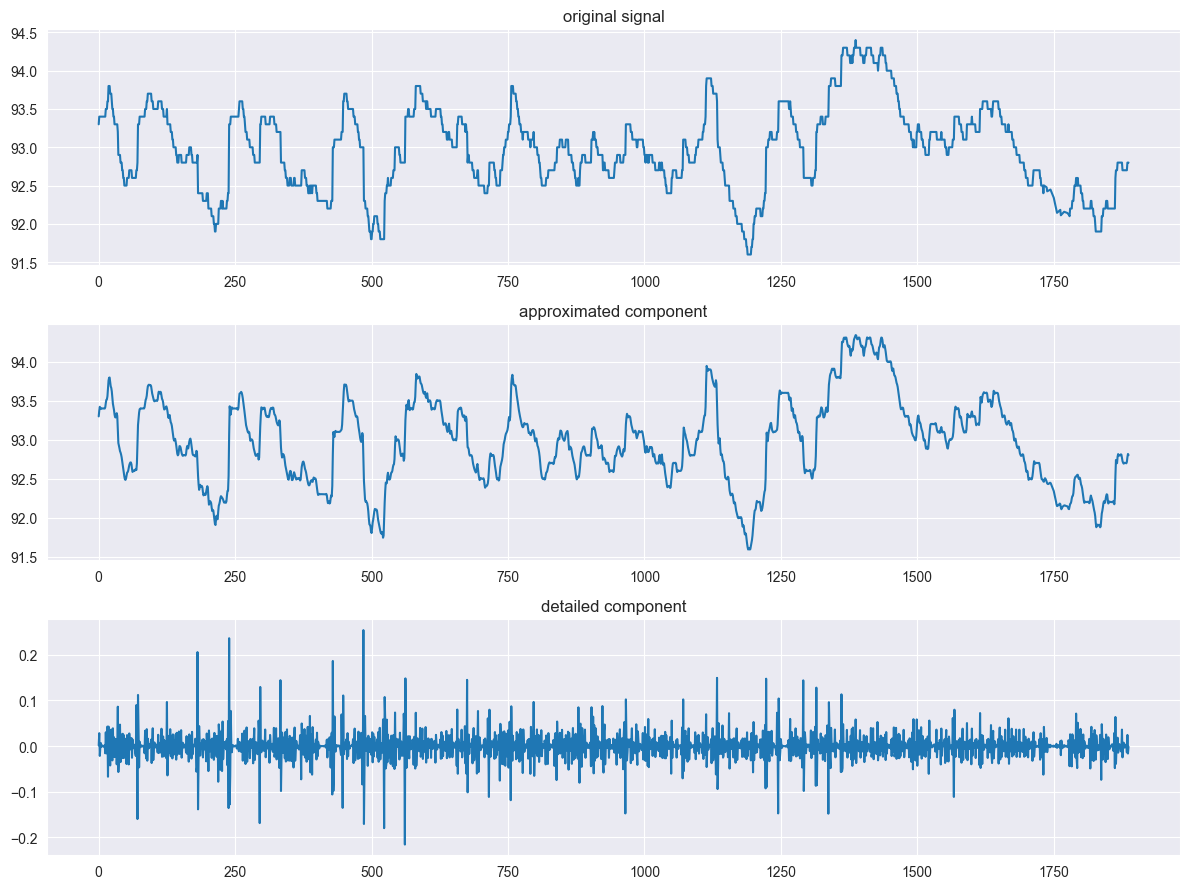

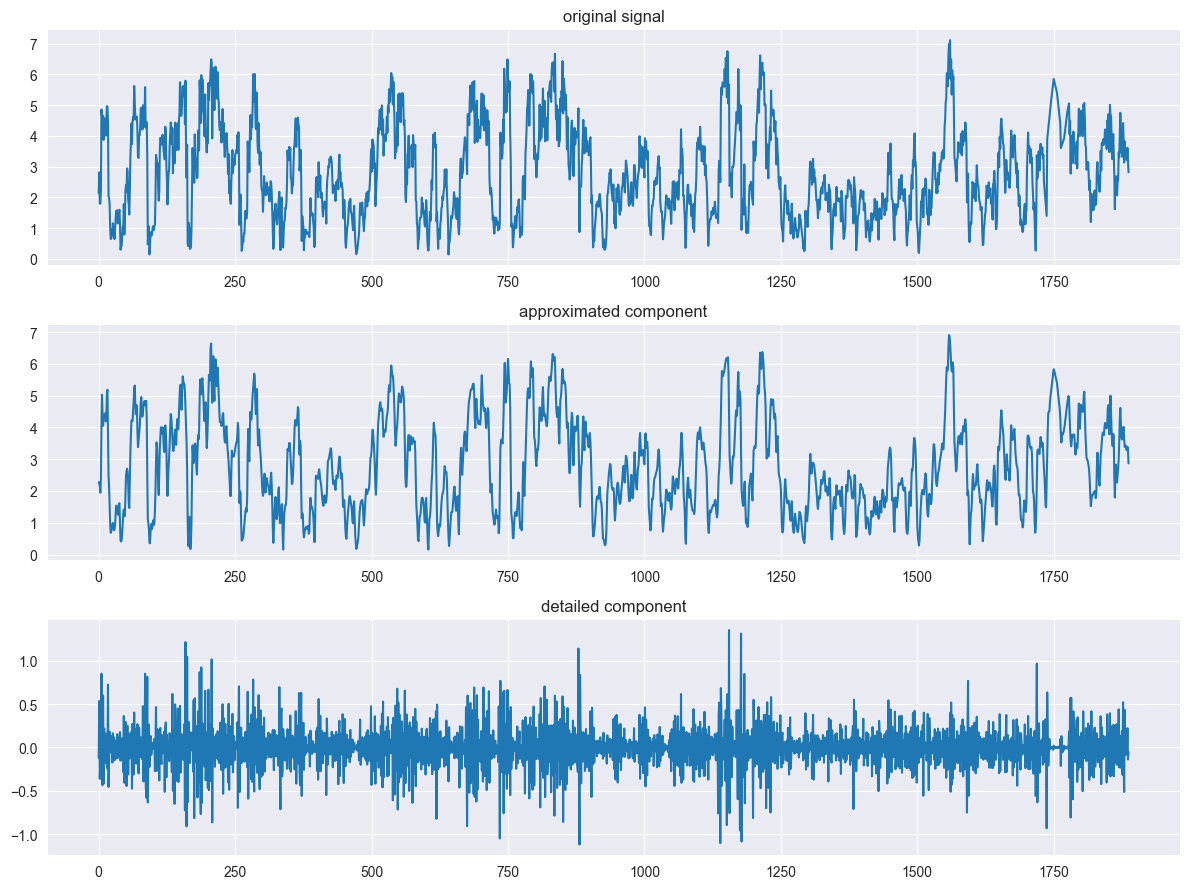

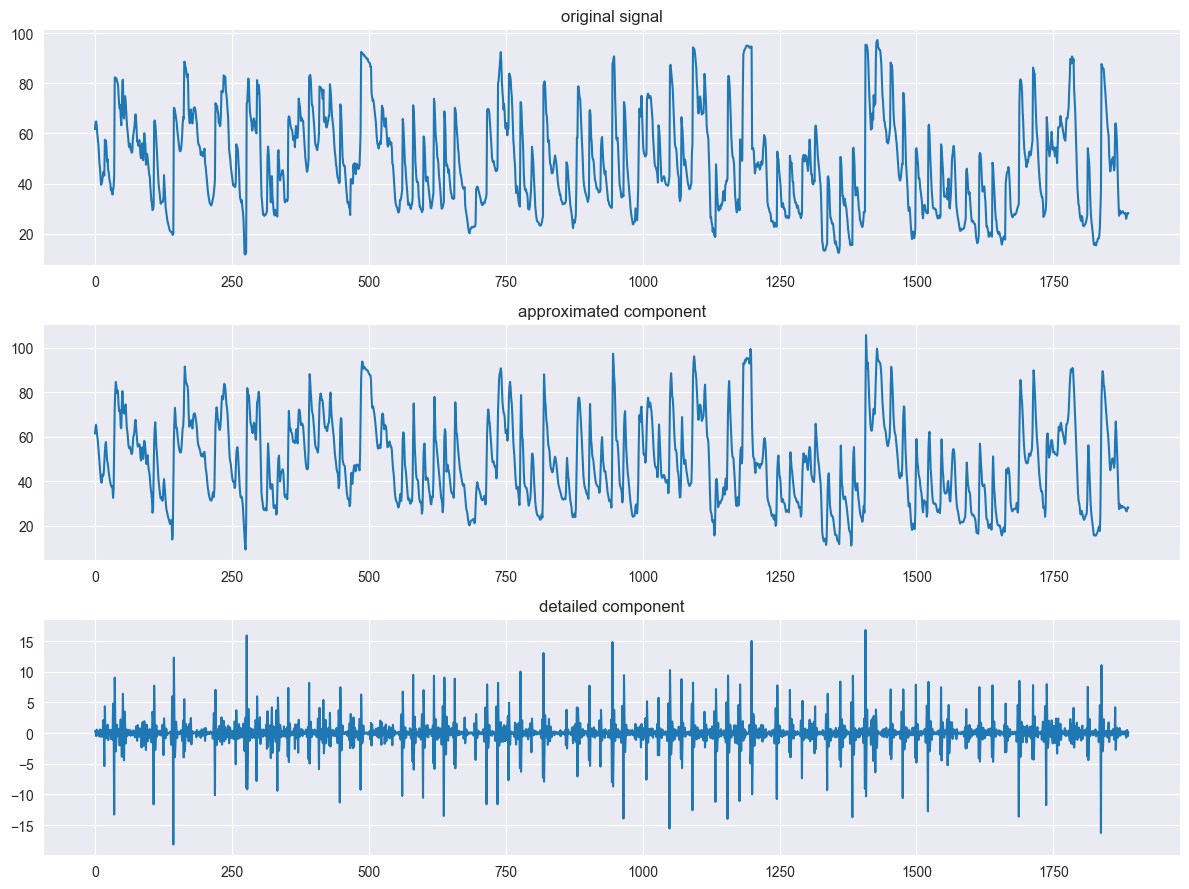

In [19]:
all_data = []
wavename = 'db5'
for i in range(len(transposed_array)):
    cA, cD = pywt.dwt(transposed_array[i], wavename)
    ya = pywt.idwt(cA, None, wavename, 'smooth')  # approximated component
    yd = pywt.idwt(None, cD, wavename, 'smooth')  # detailed component
    x = range(len(transposed_array[i]))
    plt.figure(figsize=(12, 9))
    plt.subplot(311)
    plt.plot(x, transposed_array[i])
    plt.title('original signal')
    plt.subplot(312)
    plt.plot(x, ya)
    plt.title('approximated component')
    plt.subplot(313)
    plt.plot(x, yd)
    plt.title('detailed component')
    plt.tight_layout()
    plt.show()
    # 假设你已经定义了 wavename、data_array、cA 和 cD 变量

    # 将每个数组组合为一个 DataFrame
    df = pd.DataFrame({
        'original_signal': transposed_array[i],
        'approximated_component': ya,
        'detailed_component': yd
    })
     # 将 DataFrame 添加到 all_data 列表
    all_data.append(df)
# 将所有数据合并为一个 DataFrame
merged_df = pd.concat(all_data, axis=1)
# 将 DataFrame 保存到 Excel 文件中
merged_df.to_excel('WT.xlsx', index=False)

In [68]:
# cA, cD = pywt.dwt(data_array, wavename)
# ya = pywt.idwt(cA, None, wavename, 'smooth')  # approximated component
# yd = pywt.idwt(None, cD, wavename, 'smooth')  # detailed component
# x = range(len(data_array))
# plt.figure(figsize=(12, 9))
# plt.subplot(311)
# plt.plot(x, data_array)
# plt.title('original signal')
# plt.subplot(312)
# plt.plot(x, ya)
# plt.title('approximated component')
# plt.subplot(313)
# plt.plot(x, yd)
# plt.title('detailed component')
# plt.tight_layout()
# plt.show()

In [34]:
# from openpyxl.utils.dataframe import dataframe_to_rows
# import pandas as pd
# import pywt
# import openpyxl
#
# # 假设你已经定义了 wavename、data_array、cA 和 cD 变量
#
# # 将近似分量和细节分量保存到DataFrame中
# df = pd.DataFrame({'Approximation': pywt.idwt(cA, None, wavename, 'smooth'),
#                    'Detail': pywt.idwt(None, cD, wavename, 'smooth')})
#
# # 将原始数据添加到DataFrame中
# df['Original'] = data_array
#
# # 创建一个新的Excel工作簿
# wb = openpyxl.Workbook()
#
# # 将DataFrame写入Excel工作表中
# ws = wb.active
# for r in dataframe_to_rows(df, index=False, header=True):
#     ws.append(r)
#
# # 将Excel文件保存到磁盘上
# wb.save('wavelet_data.xlsx')


In [67]:
# # 图像单边谱
# plt.figure(figsize=(12, 9))
# plt.subplot(311)
# data_f = abs(np.fft.fft(cA))/N
# data_f1 = data_f[range(int(N/2))]
# plt.plot(frq1, data_f1, 'red')
#
# plt.subplot(312)
# data_ff = abs(np.fft.fft(cD))/N
# data_f2 = data_ff[range(int(N/2))]
# plt.plot(frq1, data_f2, 'k')
#
#
# plt.xlabel('pinlv(hz)')
# plt.ylabel('amplitude')
#
# plt.show()